In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
#students = set(range(11))
G = nx.Graph()
G.name = "Simple Dating Graph"
#G.add_nodes_from(students)
dating_rel = [
    (0,3), (1,3), (2,3), (3,4),
    (4,5), (4,9), (5,6), (6,7),
    (6,8), (6,9), (9,10)
]
G.add_edges_from(dating_rel)

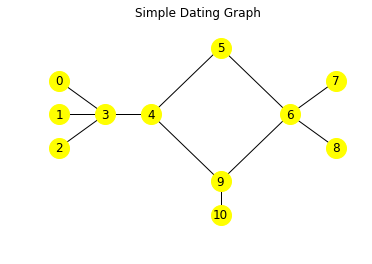

In [6]:
pos = {0: [0.1, 0.6], 1: [0.1, 0.5], 2: [0.1, 0.4], 
       3: [0.2, 0.5], 4: [0.3, 0.5], 5: [0.45, 0.7], 
       6: [0.6, 0.5], 7: [0.7, 0.6], 8: [0.7, 0.4], 
       9: [0.45, 0.3], 10: [0.45, 0.2]}
nodes = nx.draw_networkx_nodes(G, pos, node_size=400,
                               node_color='yellow')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
plt.title(G.name)
plt.axis('off')
plt.show()

Degree Centrality
{0: 0.1, 3: 0.4, 1: 0.1, 2: 0.1, 4: 0.30000000000000004, 5: 0.2, 9: 0.30000000000000004, 6: 0.4, 7: 0.1, 8: 0.1, 10: 0.1}


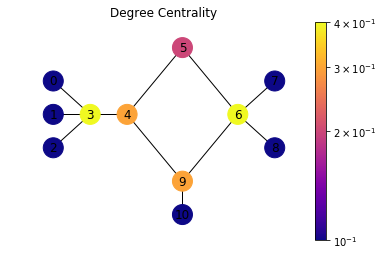

In [7]:
def draw(G, pos, measures, measure_name):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=400, 
                                   cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))


    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

print ('Degree Centrality')
print(nx.degree_centrality(G))
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')

Closeness Centrality
{0: 0.3225806451612903, 1: 0.3225806451612903, 2: 0.3225806451612903, 3: 0.45454545454545453, 4: 0.5263157894736842, 5: 0.45454545454545453, 6: 0.43478260869565216, 7: 0.3125, 8: 0.3125, 9: 0.5, 10: 0.3448275862068966}


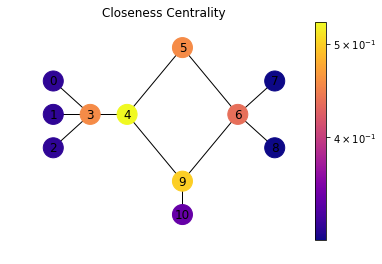

In [6]:
print ('Closeness Centrality')
print (nx.closeness_centrality(G))
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')

[(1, 6), (2, 7), (3, 3), (4, 3), (5, 2), (6, 1), (7, 1)]


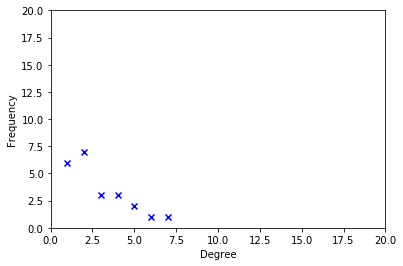

In [9]:
from collections import Counter

def graph_from_tsv (filename):
    G = nx.Graph()
    edge_set = []
    with open(filename, 'r', encoding='utf-8') as infile:
        for line in infile:
            line = line.strip('\n\r ')
            alist = line.split('\t')
            blist = alist[1].split(' ')
            for i in range(len(blist)):
                G.add_edge(alist[0], blist[i])
    return G

def degree_histogram (G):
    deg = nx.degree_centrality(G)
    deg_raw = {k: int(v * (len(G) - 1)) for k, v in deg.items()}
    deg_hist = dict(Counter(deg_raw.values()))
    deg_hist_1 = sorted(deg_hist.items(), key=lambda d: d[0])

    print (deg_hist_1)

    #plt.xscale('log')
    #plt.yscale('log')
    plt.scatter(deg_hist.keys(), deg_hist.values(), c='b', marker='x')
    plt.xlim((0, 20))
    plt.ylim((0, 20))
    plt.xlabel('Degree')
    plt.ylabel('Frequency')

    plt.show()

G2 = graph_from_tsv('cc_degree.tsv')
degree_histogram(G2)

Betweenness Centrality
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.5333333333333333, 4: 0.5555555555555556, 5: 0.16666666666666669, 6: 0.4, 7: 0.0, 8: 0.0, 9: 0.3666666666666667, 10: 0.0}


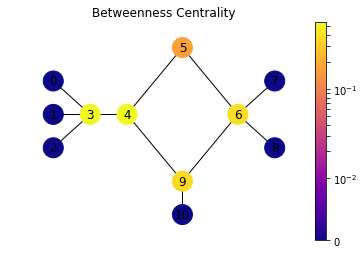

In [13]:
print ('Betweenness Centrality')
print (nx.betweenness_centrality(G))
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')